Problem statement: To build a CNN based model which can accurately detect melanoma. Melanoma is a type of cancer that can be deadly if not detected early. It accounts for 75% of skin cancer deaths. A solution which can evaluate images and alert the dermatologists about the presence of melanoma has the potential to reduce a lot of manual effort needed in diagnosis.

### Importing Skin Cancer Data
#### To do: Take necessary actions to read the data

### Importing all the important libraries

In [ ]:
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import PIL
from glob import glob
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [ ]:
## If you are using the data by mounting the google drive, use the following :
from google.colab import drive
drive.mount('/content/gdrive')

##Ref:https://towardsdatascience.com/downloading-datasets-into-google-drive-via-google-colab-bcb1b30b0166

Mounted at /content/gdrive


This assignment uses a dataset of about 2357 images of skin cancer types. The dataset contains 9 sub-directories in each train and test subdirectories. The 9 sub-directories contains the images of 9 skin cancer types respectively.

In [ ]:
# Defining the path for train and test images
## Todo: Update the paths of the train and test dataset
data_dir_train = pathlib.Path("/content/gdrive/MyDrive/Skin cancer ISIC The International Skin Imaging Collaboration/Train")
data_dir_test = pathlib.Path('/content/gdrive/MyDrive/Skin cancer ISIC The International Skin Imaging Collaboration/Test')

In [ ]:
image_count_train = len(list(data_dir_train.glob('*/*.jpg')))
print(image_count_train)
image_count_test = len(list(data_dir_test.glob('*/*.jpg')))
print(image_count_test)

2239
118


### Load using keras.preprocessing

Let's load these images off disk using the helpful image_dataset_from_directory utility.

### Create a dataset

Define some parameters for the loader:

In [ ]:
batch_size = 32
img_height = 180
img_width = 180

In [ ]:
img_size=(img_height,img_width)

In [ ]:
img_size

(180, 180)

Use 80% of the images for training, and 20% for validation.

In [ ]:
## Write your train dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir_train,
    image_size=img_size,
    batch_size=batch_size,  # You can adjust this batch size as needed
    shuffle=True,
    seed=123,
    validation_split=0.2,  # Set the validation split here
    subset="training"
)

Found 2239 files belonging to 9 classes.
Using 1792 files for training.


In [ ]:
## Write your validation dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir_train,
    image_size=img_size,
    batch_size=32,  # You can adjust this batch size as needed
    shuffle=True,
    seed=123,
    validation_split=0.2,  # Set the validation split here
    subset="validation"
)

Found 2239 files belonging to 9 classes.
Using 447 files for validation.


In [ ]:
# List out all the classes of skin cancer and store them in a list.
# You can find the class names in the class_names attribute on these datasets.
# These correspond to the directory names in alphabetical order.
class_names = train_ds.class_names
print(class_names)

['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


In [ ]:
train_ds

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 180, 180, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

### Visualize the data
#### Todo, create a code to visualize one instance of all the nine classes present in the dataset

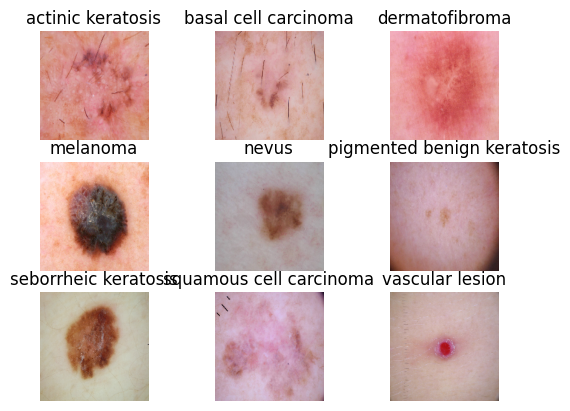

In [ ]:
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import load_img
base_dir ='/content/gdrive/MyDrive/Skin cancer ISIC The International Skin Imaging Collaboration/Train'
index=0
for class_name in class_names:
  path_to_img=base_dir+'/'+class_name
  img = path_to_img+'/'+os.listdir(base_dir+'/'+class_name)[0]
  index += 1
  plt.subplot(3,3,index)
  plt.imshow(load_img(img,target_size=(180,180)))
  plt.title(class_name)
  plt.axis("off")
### your code goes here, you can use training or validation data to visualize

The `image_batch` is a tensor of the shape `(32, 180, 180, 3)`. This is a batch of 32 images of shape `180x180x3` (the last dimension refers to color channels RGB). The `label_batch` is a tensor of the shape `(32,)`, these are corresponding labels to the 32 images.

`Dataset.cache()` keeps the images in memory after they're loaded off disk during the first epoch.

`Dataset.prefetch()` overlaps data preprocessing and model execution while training.

In [ ]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

### Create the model
#### Todo: Create a CNN model, which can accurately detect 9 classes present in the dataset. Use ```layers.experimental.preprocessing.Rescaling``` to normalize pixel values between (0,1). The RGB channel values are in the `[0, 255]` range. This is not ideal for a neural network. Here, it is good to standardize values to be in the `[0, 1]`

In [ ]:
### Your code goes here
model = Sequential()

# Add a Rescaling layer to normalize pixel values between (0, 1)
model.add(layers.experimental.preprocessing.Rescaling(1./255, input_shape=(180,180,3)))

# Add Convolutional layers
model.add(layers.Conv2D(32, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

# Flatten the output of the convolutional layers
model.add(layers.Flatten())

# Add Dense layers
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(9, activation='softmax'))  # Assuming 9 output classes

### Compile the model
Choose an appropirate optimiser and loss function for model training

In [ ]:
### Todo, choose an appropirate optimiser and loss function
# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
# View the summary of all layers
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 178, 178, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 89, 89, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 87, 87, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 43, 43, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 41, 41, 128)       7

### Train the model

In [ ]:
epochs = 30
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/30
56/56 [==============================] - 298s 1s/step - loss: 2.0796 - accuracy: 0.2388 - val_loss: 1.8824 - val_accuracy: 0.3356
Epoch 2/30
56/56 [==============================] - 2s 38ms/step - loss: 1.7154 - accuracy: 0.3845 - val_loss: 1.5603 - val_accuracy: 0.4765
Epoch 3/30
56/56 [==============================] - 2s 37ms/step - loss: 1.5700 - accuracy: 0.4604 - val_loss: 1.4273 - val_accuracy: 0.5280
Epoch 4/30
56/56 [==============================] - 2s 38ms/step - loss: 1.4203 - accuracy: 0.5201 - val_loss: 1.4475 - val_accuracy: 0.5235
Epoch 5/30
56/56 [==============================] - 2s 34ms/step - loss: 1.3083 - accuracy: 0.5301 - val_loss: 1.4396 - val_accuracy: 0.5257
Epoch 6/30
56/56 [==============================] - 2s 34ms/step - loss: 1.2896 - accuracy: 0.5391 - val_loss: 1.5538 - val_accuracy: 0.4877
Epoch 7/30
56/56 [==============================] - 2s 34ms/step - loss: 1.2529 - accuracy: 0.5530 - val_loss: 1.4398 - val_accuracy: 0.5168
Epoch 8/30
56

### Visualizing training results

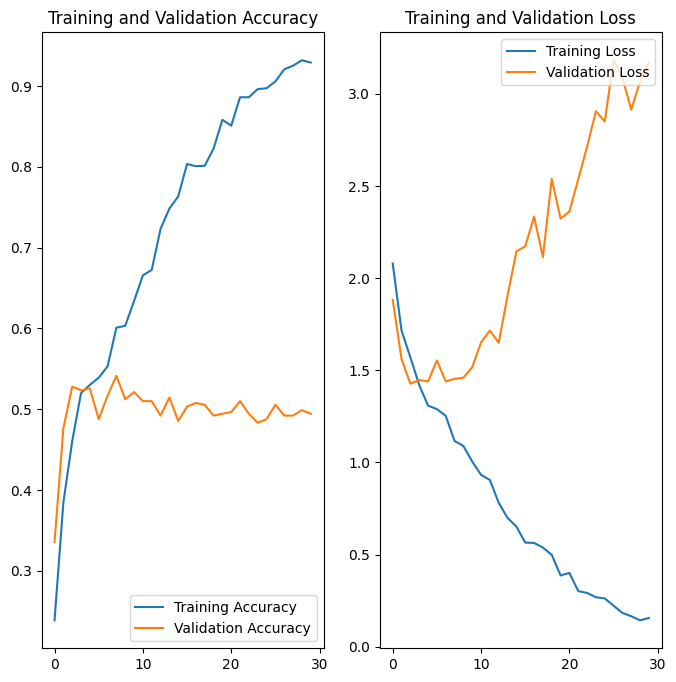

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### Todo: Write your findings after the model fit, see if there is an evidence of model overfit or underfit

### Write your findings here

In [ ]:
# Todo, after you have analysed the model fit history for presence of underfit or overfit, choose an appropriate data augumentation strategy.
# Your code goes here

### Findings:
 From the plot, we could see that the training accuracy(0.92) is far higher than the validation accuracy(0.49). Hence, we can conclude that the model is overfitting.

 To avoid the overfitting, we can use the below augmentation strategy for our dataset.
 - Zoom
 - Brightness and Contrast Adjustment


In [ ]:
# Todo, visualize how your augmentation strategy works for one instance of training image.
# Your code goes here
from tensorflow.keras.preprocessing.image import ImageDataGenerator

#  Define data augmentation parameters
datagen = ImageDataGenerator(
    rotation_range=20,
    horizontal_flip=False,
    vertical_flip=False,
    zoom_range=0.1,
    brightness_range=[0.7, 1.3],
    shear_range=0.15,
    fill_mode="nearest"
)

# Apply augmentation to your images
augmented_images = datagen.flow_from_directory(
    directory="/content/gdrive/MyDrive/Skin cancer ISIC The International Skin Imaging Collaboration/Train",
    target_size=(180, 180),
    batch_size=32,
    class_mode="categorical"
)

Found 2239 images belonging to 9 classes.


In [ ]:
type(augmented_images)

keras.src.preprocessing.image.DirectoryIterator

<class 'numpy.ndarray'>


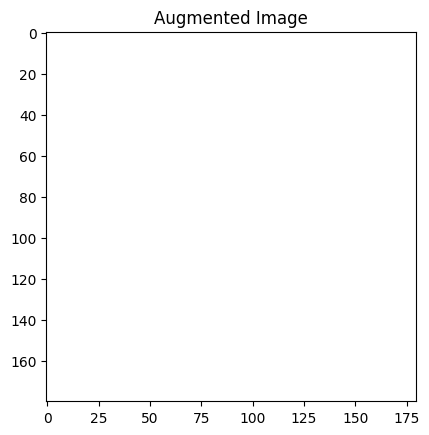

In [ ]:
import matplotlib.pyplot as plt

# Get one batch of augmented images
batch_images, batch_labels = augmented_images.next()

# Choose the first image in the batch
augmented_image = batch_images[0]
print(type(augmented_image))
# Display the augmented image
plt.imshow(augmented_image)
plt.title("Augmented Image")
plt.show()

### Todo:
### Create the model, compile and train the model


In [ ]:
## You can use Dropout layer if there is an evidence of overfitting in your findings

## Your code goes here
model_dropout = Sequential()

# Add a Rescaling layer to normalize pixel values between (0, 1)
model_dropout.add(layers.experimental.preprocessing.Rescaling(1./255, input_shape=(180,180,3)))

# Add Convolutional layers
model_dropout.add(layers.Conv2D(32, (3, 3), activation='relu'))
model_dropout.add(layers.MaxPooling2D((2, 2)))
model_dropout.add(layers.Dropout(0.25))
model_dropout.add(layers.Conv2D(64, (3, 3), activation='relu'))
model_dropout.add(layers.MaxPooling2D((2, 2)))
model_dropout.add(layers.Dropout(0.25))
model_dropout.add(layers.Conv2D(128, (3, 3), activation='relu'))
model_dropout.add(layers.MaxPooling2D((2, 2)))
model_dropout.add(layers.Dropout(0.25))

# Flatten the output of the convolutional layers
model_dropout.add(layers.Flatten())

# Add Dense layers
model_dropout.add(layers.Dense(128, activation='relu'))
model_dropout.add(layers.Dropout(0.5))
model_dropout.add(layers.Dense(9, activation='softmax'))  # Assuming 9 output classes


### Compiling the model

In [ ]:
## Your code goes here
model_dropout.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
model_dropout.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_1 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_3 (Conv2D)           (None, 178, 178, 32)      896       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 89, 89, 32)        0         
 g2D)                                                            
                                                                 
 dropout (Dropout)           (None, 89, 89, 32)        0         
                                                                 
 conv2d_4 (Conv2D)           (None, 87, 87, 64)        18496     
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 43, 43, 64)        0         
 g2D)                                                 

### Training the model

In [ ]:
## Your code goes here, note: train your model for 20 epochs
history = model_dropout.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/30
56/56 [==============================] - 7s 59ms/step - loss: 2.4704 - accuracy: 0.1998 - val_loss: 2.0640 - val_accuracy: 0.2774
Epoch 2/30
56/56 [==============================] - 3s 55ms/step - loss: 1.9833 - accuracy: 0.2651 - val_loss: 1.9369 - val_accuracy: 0.2998
Epoch 3/30
56/56 [==============================] - 3s 55ms/step - loss: 1.8865 - accuracy: 0.2935 - val_loss: 1.8730 - val_accuracy: 0.3132
Epoch 4/30
56/56 [==============================] - 3s 60ms/step - loss: 1.8300 - accuracy: 0.3253 - val_loss: 1.7932 - val_accuracy: 0.3647
Epoch 5/30
56/56 [==============================] - 3s 56ms/step - loss: 1.7491 - accuracy: 0.3761 - val_loss: 1.6371 - val_accuracy: 0.4430
Epoch 6/30
56/56 [==============================] - 3s 55ms/step - loss: 1.6590 - accuracy: 0.4102 - val_loss: 1.5866 - val_accuracy: 0.4586
Epoch 7/30
56/56 [==============================] - 3s 55ms/step - loss: 1.6681 - accuracy: 0.4035 - val_loss: 1.6426 - val_accuracy: 0.4139
Epoch 8/30
56

### Visualizing the results

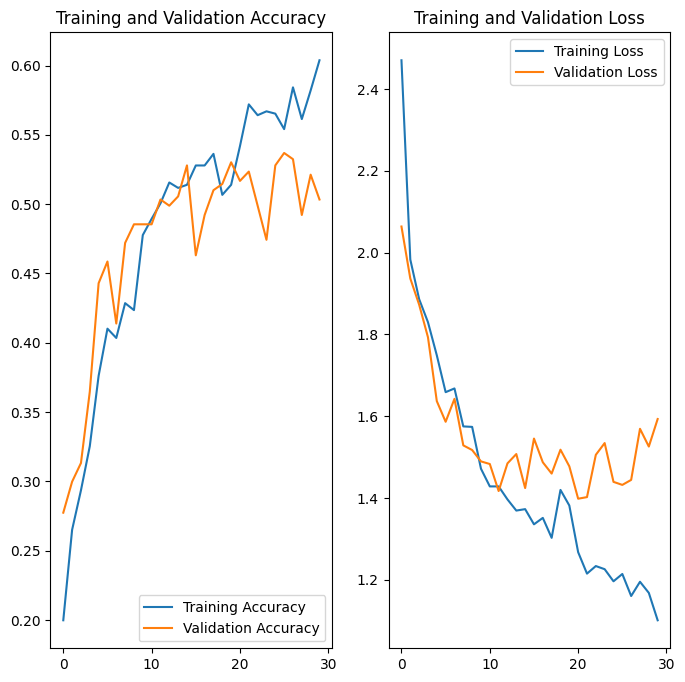

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### Todo: Write your findings after the model fit, see if there is an evidence of model overfit or underfit. Do you think there is some improvement now as compared to the previous model run?

#### Findings:
After dropout , both the training accuracy and validation accuracy has came down. But still the training accuracy(0.60) is higher than the validation accuracy(0.50). This indicates that the model is overfitting.

#### **Todo:** Find the distribution of classes in the training dataset.
#### **Context:** Many times real life datasets can have class imbalance, one class can have proportionately higher number of samples compared to the others. Class imbalance can have a detrimental effect on the final model quality. Hence as a sanity check it becomes important to check what is the distribution of classes in the data.

In [ ]:
## Your code goes here.
def class_distribution_count(directory):

    #count number of image in each classes
    count= []
    for path in pathlib.Path(directory).iterdir():
        if path.is_dir():
            count.append(len([name for name in os.listdir(path)
                               if os.path.isfile(os.path.join(path, name))]))

    #name of the classes
    sub_directory = [name for name in os.listdir(directory)
                    if os.path.isdir(os.path.join(directory, name))]

    #return dataframe with image count and class.
    return pd.DataFrame(list(zip(sub_directory,count)),columns =['Class', 'No. of Image'])

df = class_distribution_count(data_dir_train)
df

,Class,No. of Image
0,vascular lesion,139
1,actinic keratosis,114
2,melanoma,438
3,basal cell carcinoma,376
4,seborrheic keratosis,77
5,pigmented benign keratosis,462
6,nevus,357
7,squamous cell carcinoma,181
8,dermatofibroma,95


#### **Todo:** Write your findings here:
#### - Which class has the least number of samples?
##### -  seborrheic keratosis	has the less number of samples (77)
#### - Which classes dominate the data in terms proportionate number of samples?
##### - seborrheic keratosis has more number of samples (463)


#### **Todo:** Rectify the class imbalance
#### **Context:** You can use a python package known as `Augmentor` (https://augmentor.readthedocs.io/en/master/) to add more samples across all classes so that none of the classes have very few samples.

In [ ]:
!pip install Augmentor

To use `Augmentor`, the following general procedure is followed:

1. Instantiate a `Pipeline` object pointing to a directory containing your initial image data set.<br>
2. Define a number of operations to perform on this data set using your `Pipeline` object.<br>
3. Execute these operations by calling the `Pipeline’s` `sample()` method.


In [ ]:
path_to_training_dataset="/content/gdrive/MyDrive/Skin cancer ISIC The International Skin Imaging Collaboration/Train/"

import Augmentor
for i in class_names:
    p = Augmentor.Pipeline(path_to_training_dataset + i)
    p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
    p.sample(500) ## We are adding 500 samples per class to make sure that none of the classes are sparse.

Initialised with 114 image(s) found.
Output directory set to /content/gdrive/MyDrive/Skin cancer ISIC The International Skin Imaging Collaboration/Train/actinic keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7934B7684460>: 100%|██████████| 500/500 [00:23<00:00, 21.63 Samples/s]


Initialised with 376 image(s) found.
Output directory set to /content/gdrive/MyDrive/Skin cancer ISIC The International Skin Imaging Collaboration/Train/basal cell carcinoma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7934141AFCD0>: 100%|██████████| 500/500 [00:17<00:00, 28.90 Samples/s]


Initialised with 95 image(s) found.
Output directory set to /content/gdrive/MyDrive/Skin cancer ISIC The International Skin Imaging Collaboration/Train/dermatofibroma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7934B76844C0>: 100%|██████████| 500/500 [00:18<00:00, 27.03 Samples/s]


Initialised with 438 image(s) found.
Output directory set to /content/gdrive/MyDrive/Skin cancer ISIC The International Skin Imaging Collaboration/Train/melanoma/output.

Processing <PIL.Image.Image image mode=RGB size=919x802 at 0x7934141AFCD0>: 100%|██████████| 500/500 [01:31<00:00,  5.46 Samples/s]


Initialised with 357 image(s) found.
Output directory set to /content/gdrive/MyDrive/Skin cancer ISIC The International Skin Imaging Collaboration/Train/nevus/output.

Processing <PIL.Image.Image image mode=RGB size=919x802 at 0x793427F50FA0>: 100%|██████████| 500/500 [01:22<00:00,  6.09 Samples/s]


Initialised with 462 image(s) found.
Output directory set to /content/gdrive/MyDrive/Skin cancer ISIC The International Skin Imaging Collaboration/Train/pigmented benign keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x79342C0A58D0>: 100%|██████████| 500/500 [00:17<00:00, 28.41 Samples/s]


Initialised with 77 image(s) found.
Output directory set to /content/gdrive/MyDrive/Skin cancer ISIC The International Skin Imaging Collaboration/Train/seborrheic keratosis/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1024x768 at 0x793427F86EC0>: 100%|██████████| 500/500 [00:38<00:00, 13.00 Samples/s]


Initialised with 181 image(s) found.
Output directory set to /content/gdrive/MyDrive/Skin cancer ISIC The International Skin Imaging Collaboration/Train/squamous cell carcinoma/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x79342C2C82B0>: 100%|██████████| 500/500 [00:18<00:00, 27.57 Samples/s]


Initialised with 139 image(s) found.
Output directory set to /content/gdrive/MyDrive/Skin cancer ISIC The International Skin Imaging Collaboration/Train/vascular lesion/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x79342C0DD900>: 100%|██████████| 500/500 [00:17<00:00, 27.81 Samples/s]


Augmentor has stored the augmented images in the output sub-directory of each of the sub-directories of skin cancer types.. Lets take a look at total count of augmented images.

In [ ]:
image_count_train = len(list(data_dir_train.glob('*/output/*.jpg')))
print(image_count_train)

4500


### Lets see the distribution of augmented data after adding new images to the original training data.

In [ ]:
path_list = [x for x in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
path_list

['/content/gdrive/MyDrive/Skin cancer ISIC The International Skin Imaging Collaboration/Train/vascular lesion/output/vascular lesion_original_ISIC_0031276.jpg_a715c5bf-ec2f-44a2-a2ef-cd0cfc5196ba.jpg',
 '/content/gdrive/MyDrive/Skin cancer ISIC The International Skin Imaging Collaboration/Train/vascular lesion/output/vascular lesion_original_ISIC_0031759.jpg_c8e485e7-46ff-4fe5-b15b-0c6f0f2b0284.jpg',
 '/content/gdrive/MyDrive/Skin cancer ISIC The International Skin Imaging Collaboration/Train/vascular lesion/output/vascular lesion_original_ISIC_0025244.jpg_3602ea11-899f-4102-8f4e-0381217d2683.jpg',
 '/content/gdrive/MyDrive/Skin cancer ISIC The International Skin Imaging Collaboration/Train/vascular lesion/output/vascular lesion_original_ISIC_0032692.jpg_5bd161e7-a122-418f-8db3-58e58d874521.jpg',
 '/content/gdrive/MyDrive/Skin cancer ISIC The International Skin Imaging Collaboration/Train/vascular lesion/output/vascular lesion_original_ISIC_0034214.jpg_d140b1a0-45d5-4efb-82a8-5662c3020

In [ ]:
lesion_list_new = [os.path.basename(os.path.dirname(os.path.dirname(y))) for y in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
lesion_list_new

['vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',


In [ ]:
dataframe_dict_new = dict(zip(path_list, lesion_list_new))

In [ ]:
dataframe_dict_new

{'/content/gdrive/MyDrive/Skin cancer ISIC The International Skin Imaging Collaboration/Train/vascular lesion/output/vascular lesion_original_ISIC_0031276.jpg_a715c5bf-ec2f-44a2-a2ef-cd0cfc5196ba.jpg': 'vascular lesion',
 '/content/gdrive/MyDrive/Skin cancer ISIC The International Skin Imaging Collaboration/Train/vascular lesion/output/vascular lesion_original_ISIC_0031759.jpg_c8e485e7-46ff-4fe5-b15b-0c6f0f2b0284.jpg': 'vascular lesion',
 '/content/gdrive/MyDrive/Skin cancer ISIC The International Skin Imaging Collaboration/Train/vascular lesion/output/vascular lesion_original_ISIC_0025244.jpg_3602ea11-899f-4102-8f4e-0381217d2683.jpg': 'vascular lesion',
 '/content/gdrive/MyDrive/Skin cancer ISIC The International Skin Imaging Collaboration/Train/vascular lesion/output/vascular lesion_original_ISIC_0032692.jpg_5bd161e7-a122-418f-8db3-58e58d874521.jpg': 'vascular lesion',
 '/content/gdrive/MyDrive/Skin cancer ISIC The International Skin Imaging Collaboration/Train/vascular lesion/output

In [ ]:
df2 = pd.DataFrame(list(dataframe_dict_new.items()),columns = ['Path','Label'])
# new_df = path_list.append(df2)

In [ ]:
df2.head()

,Path,Label
0,/content/gdrive/MyDrive/Skin cancer ISIC The I...,vascular lesion
1,/content/gdrive/MyDrive/Skin cancer ISIC The I...,vascular lesion
2,/content/gdrive/MyDrive/Skin cancer ISIC The I...,vascular lesion
3,/content/gdrive/MyDrive/Skin cancer ISIC The I...,vascular lesion
4,/content/gdrive/MyDrive/Skin cancer ISIC The I...,vascular lesion


In [ ]:
df2['Label'].value_counts()

vascular lesion               500
actinic keratosis             500
melanoma                      500
basal cell carcinoma          500
seborrheic keratosis          500
pigmented benign keratosis    500
nevus                         500
squamous cell carcinoma       500
dermatofibroma                500
Name: Label, dtype: int64

So, now we have added 500 images to all the classes to maintain some class balance. We can add more images as we want to improve training process.

#### **Todo**: Train the model on the data created using Augmentor

In [ ]:
batch_size = 32
img_height = 180
img_width = 180

#### **Todo:** Create a training dataset

In [ ]:
data_dir_train="/content/gdrive/MyDrive/Skin cancer ISIC The International Skin Imaging Collaboration/Train"
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = "training",## Todo choose the correct parameter value, so that only training data is refered to,,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6739 files belonging to 9 classes.
Using 5392 files for training.


#### **Todo:** Create a validation dataset

In [ ]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = "validation",## Todo choose the correct parameter value, so that only validation data is refered to,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6739 files belonging to 9 classes.
Using 1347 files for validation.


#### **Todo:** Create your model (make sure to include normalization)

In [ ]:

## Your code goes here
model_aug = Sequential()

# Add a Rescaling layer to normalize pixel values between (0, 1)
model_aug.add(layers.experimental.preprocessing.Rescaling(1./255, input_shape=(180,180,3)))

# Add Convolutional layers
model_aug.add(layers.Conv2D(32, (3, 3), activation='relu'))
model_aug.add(layers.MaxPooling2D((2, 2)))
model_aug.add(layers.Dropout(0.25))
model_aug.add(layers.Conv2D(64, (3, 3), activation='relu'))
model_aug.add(layers.MaxPooling2D((2, 2)))
model_aug.add(layers.Dropout(0.25))
model_aug.add(layers.Conv2D(128, (3, 3), activation='relu'))
model_aug.add(layers.MaxPooling2D((2, 2)))
model_aug.add(layers.Dropout(0.25))

# Flatten the output of the convolutional layers
model_aug.add(layers.Flatten())

# Add Dense layers
model_aug.add(layers.Dense(128, activation='relu'))
model_aug.add(layers.Dropout(0.5))
model_aug.add(layers.Dense(9, activation='softmax'))  # Assuming 9 output classes


#### **Todo:** Compile your model (Choose optimizer and loss function appropriately)

In [ ]:
## your code goes here
model_aug.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

#### **Todo:**  Train your model

In [ ]:
epochs = 50
## Your code goes here, use 50 epochs.
## Using 50 epochs as suggested
history = model_aug.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/50
169/169 [==============================] - 42s 234ms/step - loss: 2.1629 - accuracy: 0.1929 - val_loss: 1.8417 - val_accuracy: 0.3118
Epoch 2/50
169/169 [==============================] - 37s 207ms/step - loss: 1.8246 - accuracy: 0.3049 - val_loss: 1.6696 - val_accuracy: 0.3905
Epoch 3/50
169/169 [==============================] - 36s 209ms/step - loss: 1.6807 - accuracy: 0.3568 - val_loss: 1.5088 - val_accuracy: 0.4195
Epoch 4/50
169/169 [==============================] - 36s 205ms/step - loss: 1.5849 - accuracy: 0.3960 - val_loss: 1.3934 - val_accuracy: 0.4603
Epoch 5/50
169/169 [==============================] - 40s 232ms/step - loss: 1.4704 - accuracy: 0.4240 - val_loss: 1.4438 - val_accuracy: 0.4536
Epoch 6/50
169/169 [==============================] - 35s 204ms/step - loss: 1.4858 - accuracy: 0.4256 - val_loss: 1.3062 - val_accuracy: 0.5011
Epoch 7/50
169/169 [==============================] - 38s 219ms/step - loss: 1.4188 - accuracy: 0.4605 - val_loss: 1.2708 - val_ac

#### **Todo:**  Visualize the model results

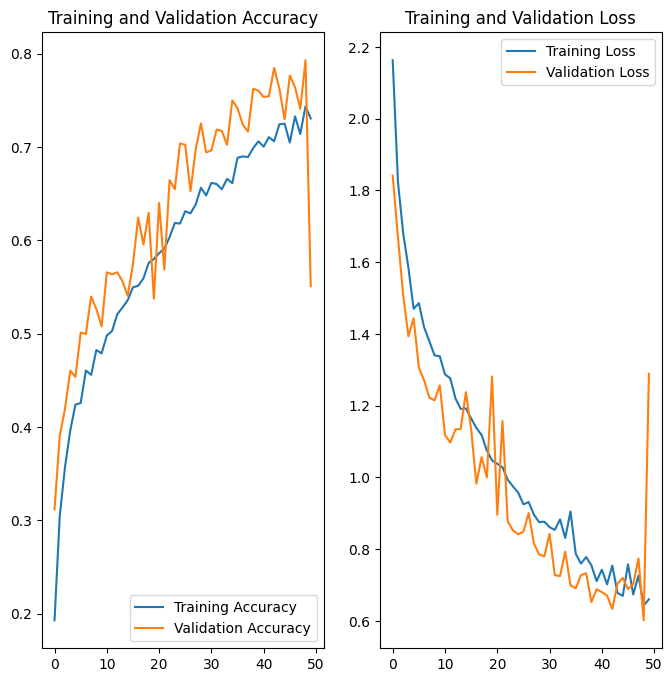

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### **Todo:**  Analyze your results here. Did you get rid of underfitting/overfitting? Did class rebalance help?



#### Findings:
 After the data augmentation, training and validation accuracy have been improved weell till the 49th epoch but there is a sudden drop in the validation accuracy at 50th epoch. Let us keep the same data and reduce the number of epoch to 30 and build the model

In [ ]:
## Your code goes here
model_aug_30 = Sequential()

# Add a Rescaling layer to normalize pixel values between (0, 1)
model_aug_30.add(layers.experimental.preprocessing.Rescaling(1./255, input_shape=(180,180,3)))

# Add Convolutional layers
model_aug_30.add(layers.Conv2D(32, (3, 3), activation='relu'))
model_aug_30.add(layers.MaxPooling2D((2, 2)))
model_aug_30.add(layers.Dropout(0.25))
model_aug_30.add(layers.Conv2D(64, (3, 3), activation='relu'))
model_aug_30.add(layers.MaxPooling2D((2, 2)))
model_aug_30.add(layers.Dropout(0.25))
model_aug_30.add(layers.Conv2D(128, (3, 3), activation='relu'))
model_aug_30.add(layers.MaxPooling2D((2, 2)))
model_aug_30.add(layers.Dropout(0.25))

# Flatten the output of the convolutional layers
model_aug_30.add(layers.Flatten())

# Add Dense layers
model_aug_30.add(layers.Dense(128, activation='relu'))
model_aug_30.add(layers.Dropout(0.5))
model_aug_30.add(layers.Dense(9, activation='softmax'))  # Assuming 9 output classes
## your code goes here
model_aug_30.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


epochs = 30
history = model_aug_30.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/30
169/169 [==============================] - 37s 203ms/step - loss: 2.0631 - accuracy: 0.2072 - val_loss: 1.8604 - val_accuracy: 0.2932
Epoch 2/30
169/169 [==============================] - 37s 213ms/step - loss: 1.6797 - accuracy: 0.3596 - val_loss: 1.5335 - val_accuracy: 0.4165
Epoch 3/30
169/169 [==============================] - 36s 208ms/step - loss: 1.5454 - accuracy: 0.4101 - val_loss: 1.4101 - val_accuracy: 0.4581
Epoch 4/30
169/169 [==============================] - 40s 232ms/step - loss: 1.4914 - accuracy: 0.4336 - val_loss: 1.3261 - val_accuracy: 0.5056
Epoch 5/30
169/169 [==============================] - 37s 211ms/step - loss: 1.4474 - accuracy: 0.4440 - val_loss: 1.2827 - val_accuracy: 0.4878
Epoch 6/30
169/169 [==============================] - 37s 212ms/step - loss: 1.3770 - accuracy: 0.4742 - val_loss: 1.2553 - val_accuracy: 0.5301
Epoch 7/30
169/169 [==============================] - 37s 207ms/step - loss: 1.3092 - accuracy: 0.4870 - val_loss: 1.2904 - val_ac

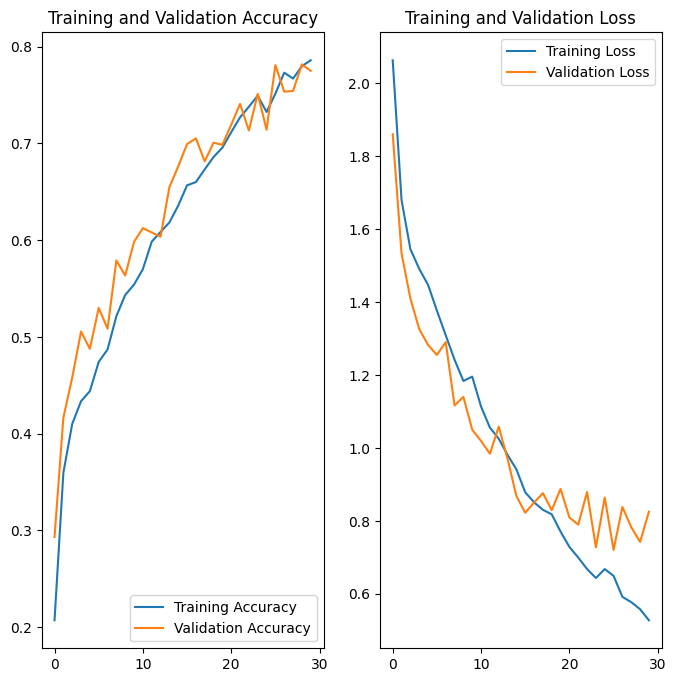

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### Findings:
After data augmentation and keeping the number of epoch as 30 the models training and validation accuracy are closer. This indicates that our model is neither overfitting nor underfitting